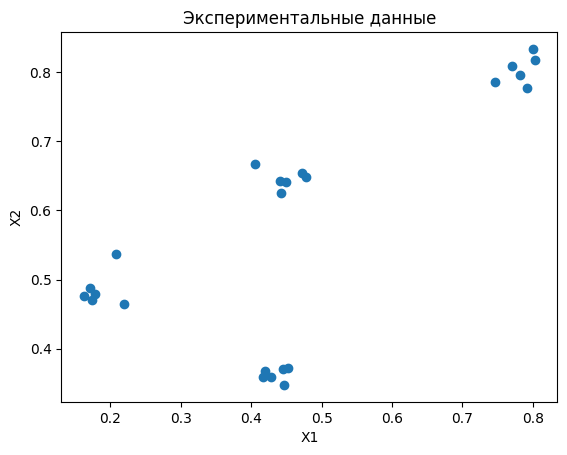

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet, cut_tree, fcluster
import seaborn as sns

# чтение данных
with open('data1.txt', 'r') as f:
    data = np.loadtxt(f)
df = pd.DataFrame(data)

plt.scatter(df[0], df[1])
plt.title('Экспериментальные данные')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
# нахождение матриц расстояния
d_evkl = pdist(data, 'euclidean')
d_standart_evkl = pdist(data, 'seuclidean')
d_town = pdist(data, 'cityblock')

# кластеризация
COLS = ['ближнего соседа', 'дальнего соседа', ' средней связи']
ROWS = ['Евклидово', 'стандарт. Евклидово', 'метрика города']

df_metrics = pd.DataFrame(index = ROWS, columns = COLS)

def count(metric, row):
    for method, col in zip(['single', 'complete', 'average'], COLS):
        cl = linkage(metric, method = method)
        c, _ = cophenet(cl, metric)
        df_metrics.loc[row, col] = c
 
# для Евклидового
count(d_evkl, ROWS[0])

# для стандартизированного Евклидового
count(d_standart_evkl, ROWS[1])

# для метрики города
count(d_town, ROWS[2])

print(df_metrics)


                    ближнего соседа дальнего соседа  средней связи
Евклидово                  0.874855        0.912065       0.916432
стандарт. Евклидово        0.872199        0.908037       0.911515
метрика города              0.88446        0.912021       0.914289


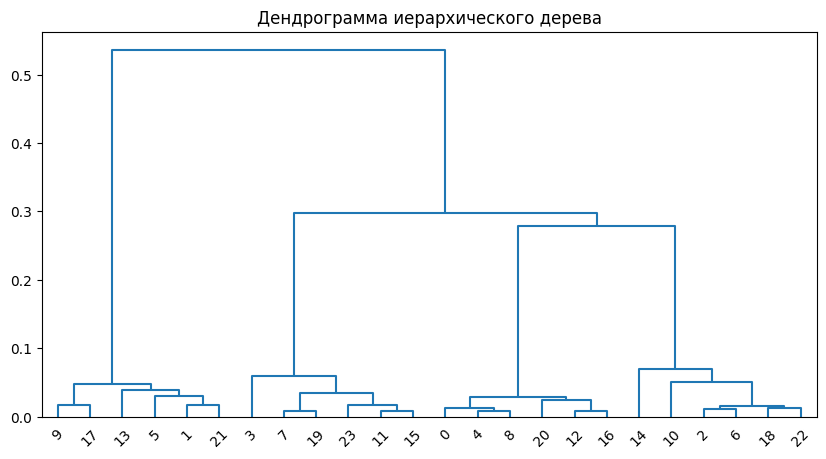

In [4]:
# Для наиболее успешной кластеризации строится дендрограмма иерархического дерева. Средней связи
tree = linkage(d_evkl, method = 'average')
plt.figure(figsize = (10, 5))
dendrogram(tree, color_threshold = 0)
plt.title('Дендрограмма иерархического дерева')
plt.show()

In [6]:
num = 0
height = 0.55
while(num < 4):
    num = len(np.unique(cut_tree(tree, height = height)))
    height -= 0.01
height +=0.01
print(height)


0.2699999999999998


In [7]:
threshold = 0.26
clusters = fcluster(tree, threshold, criterion = 'distance')

num_clusters = len(np.unique(clusters))
print("Количество кластеров:", num_clusters)
print("Количество элементов в кластере:", dict(zip(*np.unique(clusters, return_counts = True))))

Количество кластеров: 4
Количество элементов в кластере: {1: 6, 2: 6, 3: 6, 4: 6}


In [8]:
cluster_centers = []
print('Центры кластеров:')
for i in range(1, num_clusters + 1):
    cluster_centers.append(np.mean(df[clusters == i], axis = 0))
    print(cluster_centers[i - 1])

Центры кластеров:
0    0.782168
1    0.803250
dtype: float64
0    0.448193
1    0.646424
dtype: float64
0    0.434885
1    0.362562
dtype: float64
0    0.185818
1    0.485927
dtype: float64


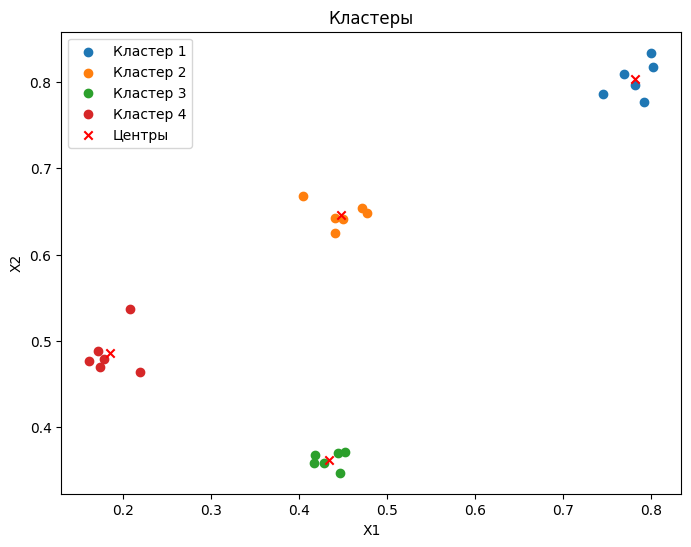

In [9]:
plt.figure(figsize = (8, 6))
for i in range(num_clusters):
    plt.scatter(df.iloc[clusters == (i + 1), 0], df.iloc[clusters == (i + 1), 1], label = f'Кластер {i + 1}')

plt.scatter(np.array(cluster_centers)[:, 0], np.array(cluster_centers)[:, 1], color = 'r', marker = 'x', label = 'Центры')
plt.title('Кластеры')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()